# Setup

In [ ]:
import pandas as pd
from math import pi
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split

# Getting rid of the stochasticy from our models by fixing the random number generator
from numpy.random import seed
seed(1)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("../datasets/clean-playlists-one-artist.csv")



# Models with only Audio Features.


In [ ]:
# First we will import the necessary libraries for the model Creation
from sklearn.feature_selection import RFECV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In this section two different studies will be selected in order to classify different Songs into Playlist. 


The first one will avoid and forget our analytical analysis from the Data Handling note book and will take in cosideration a Recursive Feature Elimination used to select the most important features in our set.


Afterwards, A model with only the selected features from our previous study will be construted.




Following a **Classification** model will be implemented using three different Classifying techniques:

*   **Random Forest Classifier**
*   **Naive Bayes**
*   **Deep Neural Network**


In order to do so, "**Playlist**" will be selected as the Target Label. From the previous study in the Data-Handling notebook, a list of the 10 most different Playlists is obtained. 

Each song in the Test set will be classified into one of the different Playlists by taking in consideration  whole set of **Audio Features** from that song, since it would give the best accuracy as RFE described. As previously explained, Audio Features are the Characteristics from a song, which are retrieved from Spotify´s API.

The list of Playlists is:

*   Tuff
*   BlueBallads
*   Punk Español
*   Rap Español(TLob)
*   Metal
*   Romanticism
*   PowerHour
*   GoldSchool
*   Chill
*   CountryNights



## Features selected by RFE

 **Recursive Feature Elimination** (RFE) with random forest

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. 


```
for i in range(1,len(features)):
  rf_classifier = RandomForestClassifier() 
  rfecv = RFECV(estimator=rf_classifier , step=1, cv=i,scoring='accuracy') 
  rfecv = rfecv.fit(x_train, y_train)

  print('Optimal number of features :', rfecv.n_features_)
  print('Best features :', x_train.columns[rfecv.support_])


  plt.figure()
  plt.xlabel("Number of features selected")
  plt.ylabel("Cross validation score of number of selected features")
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
  plt.show()
```

Finally, we find that **ALL** Audio Features will be needed for best classification. Now the model will be constructed




The Following cell will include:

*   **The Sampling Process**: by selecting only the Chosen Playlists
*   **Definition** of **X** set for the Audio Features
*   **Standarization** of **X** 
*   **Definition** of Playlist as our **Y** value or our target value


In [ ]:
#First we Sort our DataFrame for the selected Playlists in the list
chosen_pls = ['Tuff', 'BlueBallads', 'PunkEspanol', 'RapEspanol(TLob)', 'Metal', 'Romanticism', 'PowerHour', 'GoldSchool', 'Chill', 'CountryNights']
Cut_df = df.loc[df['Playlist'].isin(chosen_pls)]

#Creating our Features
X=Cut_df.iloc[:,3:-1]
features_names=X.columns
indexes=X.index

#Creating our Label 
y=Cut_df.loc[:,["Playlist"]].reset_index()
y.columns=["Song Index", "Playlist"]

#Standarize the features
X_Standarized=StandardScaler().fit_transform(X)
X_Standarized=pd.DataFrame(X_Standarized)
X_Standarized.columns=features_names
X_Standarized["Song Index"]=indexes


### ***Random Forest Classification.*** 


In [ ]:
#Random Forest Classifier
from sklearn.model_selection import KFold
RFClassifier= RandomForestClassifier(random_state=2)
RFAccuracy=[]
for i in range(0,10):

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {i+1} ...')

  #split test set
  x_test=X_Standarized.sample(n=85, random_state=i)
  indexes=x_test.index
  y_test=y.iloc[indexes,:]
  
  #split train set
  x_train=X_Standarized.drop(indexes)
  y_train=y.drop(indexes)

  #fiting for the train set and predicting with the test set
  RFClassifier= RFClassifier.fit(x_train.iloc[:,:-1],y_train.iloc[:,1])
  prediction=RFClassifier.predict(x_test.iloc[:,:-1])

  #Random Forest Classifier Accuracy 
  RFAccuracy.append(accuracy_score(y_test.iloc[:,1],prediction))

  #printing results
  print(f'Score for fold {i*1}  {RFAccuracy[i]*100}%')


print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(RFAccuracy)} (+- {np.std(RFAccuracy)})')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 0  74.11764705882354%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 1  72.94117647058823%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 2  82.35294117647058%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 3  74.11764705882354%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 4  83.52941176470588%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 5  76.47058823529412%
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 6  78.82352941176471%
--------------------------------------------------------------

### ***Naive Bayes Classification.*** 





In [ ]:
#Naive Bayes Classifier 
NBClassifier = GaussianNB()
NBAccuracy=[]

#CrossValidation
for i in range(0,10):
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {i+1} ...')

  #split test set
  x_test=X_Standarized.sample(n=85, random_state=i)
  indexes=x_test.index
  y_test=y.iloc[indexes,:]
  
  #split train set
  x_train=X_Standarized.drop(indexes)
  y_train=y.drop(indexes)

  #fiting for the train set and predicting with the test set
  NBClassifier= NBClassifier.fit(x_train.iloc[:,:-1],y_train.iloc[:,1])
  prediction=NBClassifier.predict(x_test.iloc[:,:-1])

  #Naive Bayes Classifier Accuracy 
  NBAccuracy.append(accuracy_score(y_test.iloc[:,1], prediction))
  
  #printing fold results
  print(f'Score for fold {i*1}  {NBAccuracy[i]*100}%')

#printing  overall results
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(NBAccuracy)} (+- {np.std(NBAccuracy)})')
print('------------------------------------------------------------------------')



------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 0  36.470588235294116%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 1  35.294117647058826%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 2  47.05882352941176%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 3  41.17647058823529%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 4  45.88235294117647%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 5  31.76470588235294%
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 6  35.294117647058826%
-----------------------------------------------------------

### **Deep Neural Network**

In [ ]:
# Scale continuous data
non_wanted_features = ['Name', 'Artist', 'Playlist', 'Album'] # we want now all continuous features 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_continuous=Cut_df.drop(columns=non_wanted_features)
features=X_continuous.columns

X_continuous = scaler.fit_transform(X_continuous)
X_continuous = pd.DataFrame(X_continuous)
X_continuous.columns=features

X_continuous

,Duration,Explicit,Popularity,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
0,0.067015,1.0,0.022727,0.545455,0.0,1.00,0.052408,0.609729,0.601225,0.000000,0.466076,0.891234,0.183161,0.455461,0.410860
1,0.075587,1.0,0.818182,0.000000,0.0,0.75,0.038954,0.961538,0.546984,0.000000,0.078189,0.837884,0.456425,0.710580,0.270645
2,0.151691,1.0,0.886364,0.000000,0.0,0.75,0.016163,0.520362,0.915625,0.000000,0.765749,0.912589,0.131462,0.583021,0.651194
3,0.085218,1.0,0.784091,0.090909,1.0,0.75,0.014958,0.949095,0.466626,0.000245,0.333122,0.821763,0.140325,0.273234,0.535097
4,0.106419,0.0,0.534091,0.727273,0.0,0.75,0.019577,0.705882,0.913616,0.000000,0.225493,0.920134,0.048006,0.957123,0.483551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,0.375817,0.0,0.409091,0.636364,1.0,0.75,0.001123,0.990950,0.561047,0.626927,0.064577,0.836041,0.638109,0.235717,0.483474
891,0.068400,0.0,0.590909,0.454545,0.0,0.75,0.013954,0.897059,0.930692,0.004275,0.080089,0.965154,0.242245,0.511202,0.470708
892,0.108448,0.0,0.420455,0.454545,1.0,0.75,0.006534,0.679864,0.783035,0.018397,0.063100,0.954095,0.023634,0.184264,0.509424
893,0.101885,0.0,0.500000,0.272727,0.0,0.75,0.000053,0.563348,0.637386,0.808839,0.062573,0.866857,0.024815,0.049416,0.483293


#### One Hot Encode Target Data

In [ ]:
### --- One Hot Encode Classes ---
# Convert target playlist to one hot encoded playlist for Neural Network
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
# First encode target values as integers from string
encoder = LabelEncoder()
encoder.fit(Cut_df['Playlist'])
hot_Y = encoder.transform(Cut_df['Playlist'])
# Then perform one hot encoding
hot_Y = np_utils.to_categorical(hot_Y)

In [ ]:
### --- Split data into test and train data ---
x_train, x_test, hot_y_train, hot_y_test = train_test_split(X_continuous, hot_Y, test_size=0.3)

# Convert data to friendly arrays of TensorFlow
x_train, x_test = x_train.values, x_test.values

#### Network

In [ ]:
from keras.layers import Dense, Input 
from keras import Model
from keras import optimizers
import tensorflow as tf
from sklearn.model_selection import KFold
tf.compat.v1.disable_eager_execution()

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
continuous_inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((hot_y_train,hot_y_test), axis=0)
print(continuous_inputs.shape)
## --- Model configuration ---
batch_size = 16
epochs = 60

## --- Cross Validation ---
# Define the K-fold Cross Validator
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(continuous_inputs, targets):
  ## --- Model Architecture ---
  n_numerical_feats = 15
  n_classes = 10 # number of classes/playlists
  
  # numerical features input
  size_input = n_numerical_feats
  numerical_input = Input(shape=(size_input), name='numeric_input')

  # hidden layers
  # we want to make the network abstract the input information by reducing the dimensions
  size_hidden1 = int(size_input*32)
  size_hidden2 = int(size_input*32) 

  hidden1 = Dense(size_hidden1, activation='relu')(numerical_input)
  hidden2 = Dense(size_hidden2, activation='relu')(hidden1)

  # output layers
  output = Dense(n_classes, activation='softmax')(hidden2)

  # define the model
  model = Model(numerical_input, output)
  # compile the model
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'], experimental_run_tf_function=False)

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  print(targets[train].shape)
  history = model.fit(continuous_inputs[train] , targets[train],batch_size=batch_size,epochs=epochs,verbose=2)
  
  # Plot the training vs validation curves to see if we are overfitting the model
  #plot_training(history, fold_no)

  # Generate generalization metrics
  scores = model.evaluate(continuous_inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# Provide average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')



(895, 15)
------------------------------------------------------------------------
Training for fold 1 ...
(805, 10)
Train on 805 samples
Epoch 1/60
805/805 - 0s - loss: 1.6523 - accuracy: 0.4609
Epoch 2/60
805/805 - 0s - loss: 1.0701 - accuracy: 0.6273
Epoch 3/60
805/805 - 0s - loss: 0.8956 - accuracy: 0.6807
Epoch 4/60
805/805 - 0s - loss: 0.8046 - accuracy: 0.7404
Epoch 5/60
805/805 - 0s - loss: 0.7588 - accuracy: 0.7478
Epoch 6/60
805/805 - 0s - loss: 0.7876 - accuracy: 0.7242
Epoch 7/60
805/805 - 0s - loss: 0.7224 - accuracy: 0.7553
Epoch 8/60
805/805 - 0s - loss: 0.6843 - accuracy: 0.7677
Epoch 9/60
805/805 - 0s - loss: 0.6770 - accuracy: 0.7739
Epoch 10/60
805/805 - 0s - loss: 0.6502 - accuracy: 0.7789
Epoch 11/60
805/805 - 0s - loss: 0.6505 - accuracy: 0.7590
Epoch 12/60
805/805 - 0s - loss: 0.6203 - accuracy: 0.7876
Epoch 13/60
805/805 - 0s - loss: 0.5999 - accuracy: 0.7839
Epoch 14/60
805/805 - 0s - loss: 0.5746 - accuracy: 0.8000
Epoch 15/60
805/805 - 0s - loss: 0.5674 - acc

### **Results Study**



Once the Accuracy is determined for both Classifiers it is time to choose between them, as expected from the previous study, Random Forest Classifier is more accurate than Naive Bayes. 

From now on Naive Bayes will be ignored and Random Rorest will be studied. The  mean accuracy recieved  during Cross Validation for this Classifier was a 78.39%. At first this could look like a mid Accuracy, though not the expected. But taking in consideration that it classifies over 10 different classes it is not a bad result.

Now it is time to study which are the songs that were wrongly classified, their predicted class and the actual class and afterwards determine if the error is congruent or not.


In [ ]:
#Obtain DataFrame with Expected and Actual Values and Song Indexes
  #From the List of Accuracies kept before we obatined that the iteration with 
  #less accuracy  was the second. Which has the following x_test, X_train, y_train
  #y_test

x_test=X_Standarized.sample(n=85, random_state=1)
indexes=x_test.index
y_test=y.iloc[indexes,:]
x_train=X_Standarized.drop(indexes)
y_train=y.drop(indexes)

RFClassifier= RFClassifier.fit(x_train.iloc[:,:-1],y_train.iloc[:,1])
prediction=RFClassifier.predict(x_test.iloc[:,:-1])

RFAccuracy_prove=(accuracy_score(y_test.iloc[:,1],prediction))

results=pd.DataFrame(y_test)
results['Predicted Class']=prediction
results.columns=['Song Index','Expected Class', 'Predicted Class']

#Capturing song name.
Song_indexes=results['Song Index'].tolist()
Song_Names=df.loc[Song_indexes,'Name']
#Adding to DataFrame
results["Song Name"]=Song_Names.values

#Check if prediction was accurate
correct=results['Predicted Class'] == results['Expected Class']
#Adding to DataFrame
results["Correct Prediction?"]=correct


In [ ]:
wrong_pred=results.loc[results['Correct Prediction?']== False]
wrong_pred

,Song Index,Expected Class,Predicted Class,Song Name,Correct Prediction?
535,3605,GoldSchool,RapEspanol(TLob),Lemonade,False
375,2642,PunkEspanol,Metal,Adios Reina Mia,False
81,1020,RapEspanol(TLob),Chill,Calentón,False
6,723,Tuff,RapEspanol(TLob),Cash Machine,False
175,1114,RapEspanol(TLob),Chill,Guille Asesino,False
228,2185,Metal,PunkEspanol,Biggest & The Best - Remastered version,False
622,4383,Chill,CountryNights,First,False
2,719,Tuff,GoldSchool,POWER,False
73,1012,RapEspanol(TLob),Tuff,Cheese Jardala,False
17,734,Tuff,PowerHour,Stir Fry,False


In [ ]:
from plotnine import *
Accuracy_df=pd.DataFrame([x*100 for x in NBAccuracy]).astype(float)
Accuracy_df.columns=["Accuracy NB" ]
Accuracy_df["Accuracy RF"]=[x*100 for x in RFAccuracy]
Accuracy_df["Accuracy DEEP NN"]=acc_per_fold
Accuracy_df["Fold"]=[x for x in range(1,11)]
Accuracy_df.reset_index

plot_Only_AF_RFE=(
    ggplot(Accuracy_df)+geom_line(aes(x="Fold",y="Accuracy NB"), color="r")
    + geom_line(aes(x="Fold",y="Accuracy RF"), color="b")
    + geom_line(aes(x="Fold",y="Accuracy DEEP NN"), color="y")
    + labs(x = "Folds", y= "Accuracy",color = "Legend")
)
#BLUE   = RANDOM FOREST
#RED    = NAIVE BAYES
#YELLOW = DEEP NN'''

## Features selected by our data analysis

This second model will work with The AudioFeatures selected in the Data-Handling Notebook. These Features were selected by a detailed study taking in consideration: **Correlations, Conditional Entropy** ...

The selected Features were **Acousticness, Danceability, Energy, Instrumentalness, Loudness and Valence**.

The same way as before Playlist will be our Target value and the same list of ten Playlists will be used.

The list of Playlists is:

*   Tuff
*   BlueBallads
*   Punk Español
*   Rap Español(TLob)
*   Metal
*   Romanticism
*   PowerHour
*   GoldSchool
*   Chill
*   CountryNights








The Following cell will include:

*   **The Sampling Process**: by selecting only the Chosen Playlists
*   **Definition** of **X** set for the selected Audio Features
*   **Standarization** of **X** 
*   **Definition** of Playlist as our **Y** value or our target value

In [ ]:
#First we Sort our DataFrame for the selected Playlists in the list
chosen_features=["Acousticness", "Danceability", "Energy", "Instrumentalness", "Loudness" , "Valence"]
chosen_pls = ['Tuff', 'BlueBallads', 'PunkEspanol', 'RapEspanol(TLob)', 'Metal', 'Romanticism', 'PowerHour', 'GoldSchool', 'Chill', 'CountryNights']
Cut_df = df.loc[df['Playlist'].isin(chosen_pls)]

#Creating our Features
X=Cut_df.loc[:,chosen_features]
features_names=X.columns
indexes=X.index

#Creating our Label 
y=Cut_df.loc[:,["Playlist"]].reset_index()
y.columns=["Song Index", "Playlist"]

#Standarize the features
X_Standarized=StandardScaler().fit_transform(X)
X_Standarized=pd.DataFrame(X_Standarized)
X_Standarized.columns=features_names
X_Standarized["Song Index"]=indexes



### **Random Forest Classification.**

In [ ]:
#Random Forest Classifier
RFClassifier= RandomForestClassifier(random_state=2)
RFAccuracy=[]

#CrossValidation
for i in range(0,10):
 
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {i+1} ...')
  
  #split test set
  x_test=X_Standarized.sample(n=85, random_state=i)
  indexes=x_test.index
  y_test=y.iloc[indexes,:]
  
  #split train set
  x_train=X_Standarized.drop(indexes)
  y_train=y.drop(indexes)

  #fiting for the train set and predicting with the test set
  RFClassifier= RFClassifier.fit(x_train.iloc[:,:-1],y_train.iloc[:,1])
  prediction=RFClassifier.predict(x_test.iloc[:,:-1])

  #Random Forest Classifier Accuracy 
  RFAccuracy.append(accuracy_score(y_test.iloc[:,1],prediction)*100)

  #printing results
  print(f'Score for fold {i*1}  {RFAccuracy[i]}%')


print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(RFAccuracy)} (+- {np.std(RFAccuracy)})')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 0  67.05882352941175%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 1  55.294117647058826%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 2  62.35294117647059%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 3  55.294117647058826%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 4  74.11764705882354%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 5  56.470588235294116%
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 6  60.0%
------------------------------------------------------------------------

### **Naive Bayes Classification**

In [ ]:
#Naive Bayes Classifier 
NBClassifier = GaussianNB()
NBAccuracy=[]

#CrossValidation
for i in range(0,10):

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {i+1} ...')

  #split test set
  x_test=X_Standarized.sample(n=85, random_state=i)
  indexes=x_test.index
  y_test=y.iloc[indexes,:]
  
  #split train set
  x_train=X_Standarized.drop(indexes)
  y_train=y.drop(indexes)

  #fiting for the train set and predicting with the test set
  NBClassifier= NBClassifier.fit(x_train.iloc[:,:-1],y_train.iloc[:,1])
  prediction=NBClassifier.predict(x_test.iloc[:,:-1])

  #Naive Bayes Classifier Accuracy 
  NBAccuracy.append(accuracy_score(y_test.iloc[:,1], prediction))

  #printing fold results
  print(f'Score for fold {i*1}  {NBAccuracy[i]*100}%')

#printing  overall results
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(NBAccuracy)} (+- {np.std(NBAccuracy)})')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 0  36.470588235294116%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 1  35.294117647058826%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 2  47.05882352941176%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 3  41.17647058823529%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 4  45.88235294117647%
------------------------------------------------------------------------
Training for fold 6 ...
Score for fold 5  31.76470588235294%
------------------------------------------------------------------------
Training for fold 7 ...
Score for fold 6  35.294117647058826%
-----------------------------------------------------------

### **Deep Neural Network**

In [ ]:
# Scale continuous data 
features = ['Popularity', 'Acousticness', 'Danceability','Instrumentalness', 'Loudness']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_continuous = scaler.fit_transform(Cut_df[features[:5]])
X_continuous = pd.DataFrame(X_continuous)


#### One Hot Encode Target Data

In [ ]:
### --- One Hot Encode Classes ---
# Convert target playlist to one hot encoded playlist for Neural Network
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
# First encode target values as integers from string
encoder = LabelEncoder()
encoder.fit(Cut_df['Playlist'])
hot_Y = encoder.transform(Cut_df['Playlist'])
# Then perform one hot encoding
hot_Y = np_utils.to_categorical(hot_Y)

In [ ]:
### --- Split data into test and train data ---
x_train, x_test, hot_y_train, hot_y_test = train_test_split(X_continuous, hot_Y, test_size=0.3)

# Convert data to friendly arrays of TensorFlow
x_train, x_test = x_train.values, x_test.values

#### Network

In [ ]:
from keras.layers import Dense, Input 
from keras import Model
from keras import optimizers
import tensorflow as tf
from sklearn.model_selection import KFold
tf.compat.v1.disable_eager_execution()

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
continuous_inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((hot_y_train,hot_y_test), axis=0)

## --- Model configuration ---
batch_size = 16
epochs = 50

## --- Cross Validation ---
# Define the K-fold Cross Validator
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(continuous_inputs, targets):
  ## --- Model Architecture ---
  n_numerical_feats = 5
  n_classes = 10 # number of classes/playlists
  
  # numerical features input
  size_input = n_numerical_feats
  numerical_input = Input(shape=(size_input), name='numeric_input')

  # hidden layers
  # we want to make the network abstract the input information by reducing the dimensions
  size_hidden1 = int(size_input*32)
  size_hidden2 = int(size_input*32) 

  hidden1 = Dense(size_hidden1, activation='relu')(numerical_input)
  hidden2 = Dense(size_hidden2, activation='relu')(hidden1)

  # output layers
  output = Dense(n_classes, activation='softmax')(hidden2)

  # define the model
  model = Model(numerical_input, output)
  # compile the model
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'], experimental_run_tf_function=False)

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  print(targets[train].shape)
  history = model.fit(continuous_inputs[train] , targets[train],batch_size=batch_size,epochs=epochs,verbose=2)
  
  # Plot the training vs validation curves to see if we are overfitting the model
  #plot_training(history, fold_no)

  # Generate generalization metrics
  scores = model.evaluate(continuous_inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# Provide average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
(805, 10)
Train on 805 samples
Epoch 1/50
805/805 - 0s - loss: 1.9962 - accuracy: 0.3404
Epoch 2/50
805/805 - 0s - loss: 1.5783 - accuracy: 0.4783
Epoch 3/50
805/805 - 0s - loss: 1.3792 - accuracy: 0.5354
Epoch 4/50
805/805 - 0s - loss: 1.2713 - accuracy: 0.5677
Epoch 5/50
805/805 - 0s - loss: 1.2176 - accuracy: 0.5615
Epoch 6/50
805/805 - 0s - loss: 1.1690 - accuracy: 0.6000
Epoch 7/50
805/805 - 0s - loss: 1.1349 - accuracy: 0.6112
Epoch 8/50
805/805 - 0s - loss: 1.1191 - accuracy: 0.6050
Epoch 9/50
805/805 - 0s - loss: 1.1081 - accuracy: 0.6211
Epoch 10/50
805/805 - 0s - loss: 1.1179 - accuracy: 0.6037
Epoch 11/50
805/805 - 0s - loss: 1.0758 - accuracy: 0.6323
Epoch 12/50
805/805 - 0s - loss: 1.0621 - accuracy: 0.6224
Epoch 13/50
805/805 - 0s - loss: 1.0475 - accuracy: 0.6460
Epoch 14/50
805/805 - 0s - loss: 1.0525 - accuracy: 0.6286
Epoch 15/50
805/805 - 0s - loss: 1.0511 - accuracy: 0.6

### **Results Study**



Once the Accuracy is determined for both Classifiers it is time to choose between them, as expected from the previous study, Random Forest Classifier is more accurate than Naive Bayes. 

From now on Naive Bayes will be ignored and Random Rorest will be studied. The  mean accuracy recieved  during Cross Validation for this Classifier was a 61.71%. The result is lower than with all the AudioFeatures.

Now it is time to study which are the songs that were wrongly classified, their predicted class and the actual class and afterwards determine if the error is congruent or not.


In [ ]:
#Obtain DataFrame with Expected and Actual Values and Song Indexes
  #From the List of Accuracies kept before we obatined that the iteration with 
  #less accuracy  was the second. Which has the following x_test, X_train, y_train
  #y_test

x_test=X_Standarized.sample(n=85, random_state=1)
indexes=x_test.index
y_test=y.iloc[indexes,:]
x_train=X_Standarized.drop(indexes)
y_train=y.drop(indexes)


RFClassifier= RFClassifier.fit(x_train.iloc[:,:-1],y_train.iloc[:,1])
prediction=RFClassifier.predict(x_test.iloc[:,:-1])
RFAccuracy_prove=(accuracy_score(y_test.iloc[:,1],prediction))

results=pd.DataFrame(y_test)
results['Predicted Class']=prediction
results.columns=['Song Index','Expected Class', 'Predicted Class']

#Capturing song name.
Song_indexes=results['Song Index'].tolist()
Song_Names=df.loc[Song_indexes,'Name']
#Adding to DataFrame
results["Song Name"]=Song_Names.values

#Check if prediction was accurate
correct=results['Predicted Class'] == results['Expected Class']
#Adding to DataFrame
results["Correct Prediction?"]=correct

results


,Song Index,Expected Class,Predicted Class,Song Name,Correct Prediction?
535,3605,GoldSchool,RapEspanol(TLob),Lemonade,False
34,973,RapEspanol(TLob),RapEspanol(TLob),Mi Crucifixión,True
375,2642,PunkEspanol,Metal,Adios Reina Mia,False
81,1020,RapEspanol(TLob),Chill,Calentón,False
6,723,Tuff,RapEspanol(TLob),Cash Machine,False
...,...,...,...,...,...
613,4374,Chill,Chill,Grey Lynn Park,True
711,4632,Romanticism,Romanticism,"Six Piano Pieces, Op. 118: Intermezzo in A Maj...",True
618,4379,Chill,BlueBallads,Ho Hey,False
388,2655,PunkEspanol,Metal,La locura,False


In [ ]:
wrong_pred=results.loc[results['Correct Prediction?']== False]
wrong_pred

,Song Index,Expected Class,Predicted Class,Song Name,Correct Prediction?
535,3605,GoldSchool,RapEspanol(TLob),Lemonade,False
375,2642,PunkEspanol,Metal,Adios Reina Mia,False
81,1020,RapEspanol(TLob),Chill,Calentón,False
6,723,Tuff,RapEspanol(TLob),Cash Machine,False
175,1114,RapEspanol(TLob),Chill,Guille Asesino,False
228,2185,Metal,PunkEspanol,Biggest & The Best - Remastered version,False
622,4383,Chill,CountryNights,First,False
2,719,Tuff,GoldSchool,POWER,False
73,1012,RapEspanol(TLob),Tuff,Cheese Jardala,False
17,734,Tuff,PowerHour,Stir Fry,False


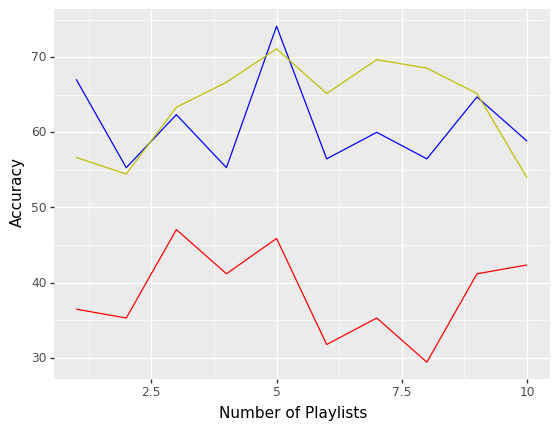

<ggplot: (-9223363296542371566)>

In [ ]:

Accuracy_df=pd.DataFrame()
Accuracy_df=pd.DataFrame([x*100 for x in NBAccuracy]).astype(float)
Accuracy_df.columns=["Accuracy NB" ]
Accuracy_df["Accuracy RF"]=RFAccuracy
Accuracy_df["Accuracy DEEP NN"]=acc_per_fold
Accuracy_df["Fold"]=[x for x in range(1,11)]
Accuracy_df.reset_index

plot_Own_AF_RFE=(
    ggplot(Accuracy_df)+geom_line(aes(x="Fold",y="Accuracy NB"), color="r")
    + geom_line(aes(x="Fold",y="Accuracy RF"), color="b")
    + geom_line(aes(x="Fold",y="Accuracy DEEP NN"), color="y")
    + labs(x = "Folds", y= "Accuracy",color = "Legend")
)
#BLUE   = RANDOM FOREST
#RED    = NAIVE BAYES
#YELLOW = DEEP NN'''
plot_Own_AF_RFE

# Models with Continuous and Categorical Features 

In this section two different studies will be selected in order to classify different Songs into Playlist. 


The first one will avoid and forget our analytical analysis from the Data Handling note book and will take in cosideration a Recursive Feature Elimination used to select the most important features in our set.


Afterwards, A model with only the selected features from our previous study will be construted.






Following a **Classification** model will be implemented using three different Classifying techniques:

*   **Random Forest Classifier**
*   **Naive Bayes**
*   **Deep Neural Network**


In order to do so, "**Playlist**" will be selected as the Target Label. From the previous study in the Data-Handling notebook, a list of the 10 most different Playlists is obtained. 

Each song in the Test set will be classified into one of the different Playlists by taking in consideration  whole set of **Audio Features** from that song and the Artist as a categorical feature. As previously explained, Audio Features are the Characteristics from a song, which are retrieved from Spotify´s API.

The list of Playlists is:

*   Tuff
*   BlueBallads
*   Punk Español
*   Rap Español(TLob)
*   Metal
*   Romanticism
*   PowerHour
*   GoldSchool
*   Chill
*   CountryNights

In order to do the classification an **embedding** will be constructed for the Artist Column, which will be later added to the continious features.

In [ ]:
def plot_training(history, embedding_dim, batch_size):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'Model Accuracy embedding_dims={embedding_dim}, batch_size={batch_size}')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'Model Loss embedding_dims={embedding_dim}, batch_size={batch_size}')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

In [ ]:
### --- Use playlists chose in Data Analysis section ---
chosen_pls = ['Tuff', 'BlueBallads', 'PunkEspanol', 'RapEspanol(TLob)', 'Metal', 'Romanticism', 'PowerHour', 'GoldSchool', 'Chill', 'CountryNights']
df_10_playlist = df.loc[df['Playlist'].isin(chosen_pls)]


## Features selected by RFE

In [ ]:
# Scale continuous data
non_wanted_features = ['Name', 'Artist', 'Playlist', 'Album'] # we want now all continuous features 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_continuous=df_10_playlist.drop(columns=non_wanted_features)
features=X_continuous.columns

X_continuous = scaler.fit_transform(X_continuous)
X_continuous = pd.DataFrame(X_continuous)
X_continuous.columns=features

X_continuous

,Duration,Explicit,Popularity,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
0,0.067015,1.0,0.022727,0.545455,0.0,1.00,0.052408,0.609729,0.601225,0.000000,0.466076,0.891234,0.183161,0.455461,0.410860
1,0.075587,1.0,0.818182,0.000000,0.0,0.75,0.038954,0.961538,0.546984,0.000000,0.078189,0.837884,0.456425,0.710580,0.270645
2,0.151691,1.0,0.886364,0.000000,0.0,0.75,0.016163,0.520362,0.915625,0.000000,0.765749,0.912589,0.131462,0.583021,0.651194
3,0.085218,1.0,0.784091,0.090909,1.0,0.75,0.014958,0.949095,0.466626,0.000245,0.333122,0.821763,0.140325,0.273234,0.535097
4,0.106419,0.0,0.534091,0.727273,0.0,0.75,0.019577,0.705882,0.913616,0.000000,0.225493,0.920134,0.048006,0.957123,0.483551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,0.375817,0.0,0.409091,0.636364,1.0,0.75,0.001123,0.990950,0.561047,0.626927,0.064577,0.836041,0.638109,0.235717,0.483474
891,0.068400,0.0,0.590909,0.454545,0.0,0.75,0.013954,0.897059,0.930692,0.004275,0.080089,0.965154,0.242245,0.511202,0.470708
892,0.108448,0.0,0.420455,0.454545,1.0,0.75,0.006534,0.679864,0.783035,0.018397,0.063100,0.954095,0.023634,0.184264,0.509424
893,0.101885,0.0,0.500000,0.272727,0.0,0.75,0.000053,0.563348,0.637386,0.808839,0.062573,0.866857,0.024815,0.049416,0.483293


In [ ]:
### --- Encode Artist Names ---
# Integer encode artist names
X = X_continuous
X['Artist'] = df_10_playlist['Artist'].values
# We will estimate the vocabulary size of (unique_artists*1000), which is much larger than needed to
# reduce the probability of collisions from the hash function. (unique_artists = 510)
vocab_size = len(df['Artist'].unique()) * 1000
from keras.preprocessing.text import one_hot
X['Encoded Artist'] = ''
for idx, row in X.iterrows():
    X.at[idx, 'Encoded Artist'] = one_hot(row['Artist'],vocab_size)
    #print("The encoding for ", row['Artist'] ,"is :", X.at[idx, 'Encoded Artist'])

# Padding
## Find max len to do padding
maxlen = -1
for idx, row in X.iterrows():
  if len(row['Encoded Artist']) > maxlen:
    maxlen = len(row['Encoded Artist'])

## Perform padding
from keras.preprocessing.sequence import pad_sequences
encodings_padded = []
for idx, row in X.iterrows():
    encodings_padded.append(row['Encoded Artist'])

encodings_padded = pad_sequences(encodings_padded, maxlen=maxlen, padding='post')

X.drop(columns='Encoded Artist')
X['Encoded Artist'] = None
for (idx, row), encoding in zip(X.iterrows(), encodings_padded):
    X.at[idx, 'Encoded Artist'] = encoding
X.drop(columns=['Artist'], inplace=True)

Y = df_10_playlist['Playlist']

In [ ]:
### --- Split data into test and train data ---
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Split data into continuous and categorical data
x_train_artist, x_test_artist = x_train['Encoded Artist'], x_test['Encoded Artist']
x_train_continuous, x_test_continuous = x_train.drop(columns=['Encoded Artist']), x_test.drop(columns=['Encoded Artist'])

# Convert data to friendly arrays of TensorFlow
x_train_artist, x_test_artist  = x_train_artist.values, x_test_artist.values
x_train_artist, x_test_artist = x_train_artist.tolist(), x_test_artist.tolist()
x_train_artist, x_test_artist = np.asarray(x_train_artist).astype('float32'), np.asarray(x_test_artist).astype('float32')

x_train_continuous, x_test_continuous = x_train_continuous.values, x_test_continuous.values

### **Deep Neural Network**

#### One Hot Encode Target Data

In [ ]:
### --- One Hot Encode Classes ---
# Convert target playlist to one hot encoded playlist for Neural Network
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
# First encode target values as integers from string
encoder = LabelEncoder()
encoder.fit(Y)
hot_Y = encoder.transform(Y)
# Then perform one hot encoding
hot_Y = np_utils.to_categorical(hot_Y)

#### Network

In [ ]:
from keras.layers import Embedding, concatenate, Dense, Input, Flatten
from keras import Model
from keras import optimizers
import tensorflow as tf
from sklearn.model_selection import KFold
tf.compat.v1.disable_eager_execution()

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
continuous_inputs = np.concatenate((x_train_continuous, x_test_continuous), axis=0)
artist_inputs  = np.concatenate((x_train_artist, x_test_artist), axis=0)
inputs = np.concatenate((continuous_inputs, artist_inputs), axis=1)
targets = np.concatenate((hot_y_train,hot_y_test), axis=0)

## --- Model configuration ---
batch_size = 16
epochs = 5
artist_embd_dim = 9

## --- Cross Validation ---
# Define the K-fold Cross Validator
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  ## --- Model Architecture ---
  n_numerical_feats = 15
  n_classes = 10 # number of classes/playlists
  # artist input to embeddings
  artist_input = Input(shape=(maxlen,), name='artist_input')
  artist_embedding = Embedding(vocab_size, artist_embd_dim,input_length=maxlen)(artist_input)
  artist_vec=Flatten()(artist_embedding)
  # numerical features input
  numerical_input = Input(shape=(n_numerical_feats), name='numeric_input')

  # input layer
  merged = concatenate([numerical_input, artist_vec])

  # hidden layers
  # we want to make the network abstract the input information by reducing the dimensions
  size_input = n_numerical_feats+(artist_embd_dim*maxlen)
  size_hidden1 = int(size_input*32)
  size_hidden2 = int(size_input*32) 

  hidden1 = Dense(size_hidden1, activation='relu')(merged)
  hidden2 = Dense(size_hidden2, activation='relu')(hidden1)

  # output layers
  output = Dense(n_classes, activation='softmax')(hidden2)

  # define the model
  model = Model([numerical_input,artist_input], output)
  # compile the model
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'], experimental_run_tf_function=False)

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  artist_input_train = inputs[train][:,15:15+maxlen]; continuous_input_train = inputs[train][:,:15]
  artist_input_test = inputs[test][:,15:15+maxlen]; continuous_input_test = inputs[test][:,:15]

  history = model.fit([continuous_input_train,artist_input_train], [targets[train]],batch_size=batch_size,epochs=epochs,verbose=2)
  
  # Plot the training vs validation curves to see if we are overfitting the model
  #plot_training(history, fold_no)

  # Generate generalization metrics
  scores = model.evaluate([continuous_input_test,artist_input_test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# Provide average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

In [ ]:
# Save model representation picture
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/Colab Notebooks/spotify-playlist-recommender/dnn_cat_num.png', show_shapes=True, show_layer_names=True)

### **Naive Bayes**

In [ ]:
from keras.layers import Embedding, Input, Flatten
from keras import Model
from keras import optimizers
artist_embd_dim = 9
# artist embeddings
artist_input = Input(shape=(maxlen,), name='artist_input')
artist_embedding = Embedding(vocab_size, artist_embd_dim,input_length=maxlen)(artist_input)
artist_vec=Flatten()(artist_embedding)

# Define the model
embed_model = Model([artist_input], artist_vec)
embed_model.compile(optimizer=optimizers.Adam(lr=1e-3),loss='binary_crossentropy',metrics=['accuracy']) 

# Generate embeddings
embed_artist_train, embed_artist_test = embed_model.predict(x_train_artist), embed_model.predict(x_test_artist)

x_train_embedded, x_test_embedded = [None]*len(x_train_continuous), [None]*len(x_test_continuous)

x_train_embedded = [list(x_train_continuous[i]) + list(embed_artist_train[i]) for i in range(len(x_train_continuous))]
x_test_embedded = [list(x_test_continuous[i]) + list(embed_artist_test[i]) for i in range(len(x_test_continuous))]
x_train_embedded, x_test_embedded  = np.asarray(np.array(x_train_embedded)).astype('float32'), np.asarray(np.array(x_test_embedded)).astype('float32')

In [ ]:
from sklearn.model_selection import KFold
#Naive Bayes Classifier 
NBClassifier = GaussianNB()
NBAccuracy=[]

inputs = np.concatenate((x_train_embedded,x_test_embedded), axis=0)
targets = np.concatenate((y_train,y_test), axis=0)

#CrossValidation
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_foldNB = []
for train, test in kfold.split(inputs, targets):
  
  #fiting for the train set and predicting with the test set
  NBClassifier= NBClassifier.fit(inputs[train],targets[train])
  prediction=NBClassifier.predict(inputs[test])

  #Naive Bayes Classifier Accuracy 
  accuracy = accuracy_score(targets[test], prediction)
    
  # Generate generalization metrics
  acc_per_foldNB.append(accuracy * 100)

  # Increase fold number
  fold_no = fold_no + 1

# Provide average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_foldNB)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {acc_per_foldNB[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_foldNB)} (+- {np.std(acc_per_foldNB)})')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Accuracy: 40.0%
------------------------------------------------------------------------
> Fold 2 - Accuracy: 37.77777777777778%
------------------------------------------------------------------------
> Fold 3 - Accuracy: 32.22222222222222%
------------------------------------------------------------------------
> Fold 4 - Accuracy: 41.11111111111111%
------------------------------------------------------------------------
> Fold 5 - Accuracy: 38.88888888888889%
------------------------------------------------------------------------
> Fold 6 - Accuracy: 32.58426966292135%
------------------------------------------------------------------------
> Fold 7 - Accuracy: 38.20224719101123%
------------------------------------------------------------------------
> Fold 8 - Accuracy: 32.58426966292135%
---------------------

### **Random Forest** 

In [ ]:
from sklearn.model_selection import KFold
#Random Forest Classifier
RFClassifier= RandomForestClassifier(random_state=2)
RFAccuracy=[]

inputs = np.concatenate((x_train_embedded,x_test_embedded), axis=0)
targets = np.concatenate((y_train,y_test), axis=0)

#CrossValidation
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_foldRF = []
for train, test in kfold.split(inputs, targets):
  
  #fiting for the train set and predicting with the test set
  RFClassifier= RFClassifier.fit(inputs[train],targets[train])
  prediction=RFClassifier.predict(inputs[test])

  #Naive Bayes Classifier Accuracy 
  accuracy = accuracy_score(targets[test], prediction)
    
  # Generate generalization metrics
  acc_per_foldRF.append(accuracy * 100)

  # Increase fold number
  fold_no = fold_no + 1

# Provide average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_foldRF)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {acc_per_foldRF[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_foldRF)} (+- {np.std(acc_per_foldRF)})')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Accuracy: 80.0%
------------------------------------------------------------------------
> Fold 2 - Accuracy: 84.44444444444444%
------------------------------------------------------------------------
> Fold 3 - Accuracy: 88.88888888888889%
------------------------------------------------------------------------
> Fold 4 - Accuracy: 81.11111111111111%
------------------------------------------------------------------------
> Fold 5 - Accuracy: 92.22222222222223%
------------------------------------------------------------------------
> Fold 6 - Accuracy: 76.40449438202246%
------------------------------------------------------------------------
> Fold 7 - Accuracy: 84.26966292134831%
------------------------------------------------------------------------
> Fold 8 - Accuracy: 79.7752808988764%
----------------------

### Results Study


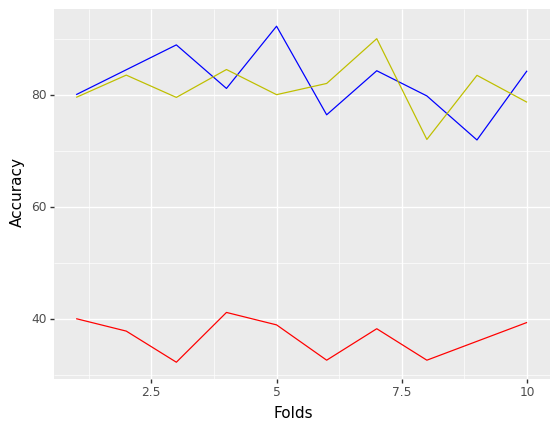

<ggplot: (-9223363296546241427)>

In [ ]:
Accuracy_df=pd.DataFrame()
Accuracy_df=pd.DataFrame(acc_per_foldNB).astype(float)
Accuracy_df.columns=["Accuracy NB" ]
Accuracy_df["Accuracy RF"]=acc_per_foldRF
Accuracy_df["Accuracy DEEP NN"]=acc_per_fold
Accuracy_df["Fold"]=[x for x in range(1,11)]
Accuracy_df.reset_index

plot_cat_all_AF_RFE=(
    ggplot(Accuracy_df)+geom_line(aes(x="Fold",y="Accuracy NB"), color="r")
    + geom_line(aes(x="Fold",y="Accuracy RF"), color="b")
    + geom_line(aes(x="Fold",y="Accuracy DEEP NN"), color="y")
    + labs(x = "Folds", y= "Accuracy",color = "Legend")
)
#BLUE   = RANDOM FOREST
#RED    = NAIVE BAYES
#YELLOW = DEEP NN'''
plot_cat_all_AF_RFE

## Features selected by our Data Analysis

In [ ]:
# Scale continuous data 
features = ['Popularity', 'Acousticness', 'Danceability','Instrumentalness', 'Loudness', 'Encoded Artist']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_continuous = scaler.fit_transform(df_10_playlist[features[:5]])
X_continuous = pd.DataFrame(X_continuous)

In [ ]:
### --- Encode Artist Names ---
# Integer encode artist names
X = X_continuous
X['Artist'] = df_10_playlist['Artist'].values
# We will estimate the vocabulary size of (unique_artists*1000), which is much larger than needed to
# reduce the probability of collisions from the hash function. (unique_artists = 510)
vocab_size = len(df['Artist'].unique()) * 1000
from keras.preprocessing.text import one_hot
X['Encoded Artist'] = ''
for idx, row in X.iterrows():
    X.at[idx, 'Encoded Artist'] = one_hot(row['Artist'],vocab_size)
    #print("The encoding for ", row['Artist'] ,"is :", X.at[idx, 'Encoded Artist'])

# Padding
## Find max len to do padding
maxlen = -1
for idx, row in X.iterrows():
  if len(row['Encoded Artist']) > maxlen:
    maxlen = len(row['Encoded Artist'])

## Perform padding
from keras.preprocessing.sequence import pad_sequences
encodings_padded = []
for idx, row in X.iterrows():
    encodings_padded.append(row['Encoded Artist'])

encodings_padded = pad_sequences(encodings_padded, maxlen=maxlen, padding='post')

X.drop(columns='Encoded Artist')
X['Encoded Artist'] = None
for (idx, row), encoding in zip(X.iterrows(), encodings_padded):
    X.at[idx, 'Encoded Artist'] = encoding
X.drop(columns=['Artist'], inplace=True)

Y = df_10_playlist['Playlist']

In [ ]:
### --- Split data into test and train data ---
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Split data into continuous and categorical data
x_train_artist, x_test_artist = x_train['Encoded Artist'], x_test['Encoded Artist']
x_train_continuous, x_test_continuous = x_train.drop(columns=['Encoded Artist']), x_test.drop(columns=['Encoded Artist'])

# Convert data to friendly arrays of TensorFlow
x_train_artist, x_test_artist  = x_train_artist.values, x_test_artist.values
x_train_artist, x_test_artist = x_train_artist.tolist(), x_test_artist.tolist()
x_train_artist, x_test_artist = np.asarray(x_train_artist).astype('float32'), np.asarray(x_test_artist).astype('float32')

x_train_continuous, x_test_continuous = x_train_continuous.values, x_test_continuous.values

### **Deep Neural Network**

#### One Hot Encode Target Data

In [ ]:
### --- One Hot Encode Classes ---
# Convert target playlist to one hot encoded playlist for Neural Network
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
# First encode target values as integers from string
encoder = LabelEncoder()
encoder.fit(Y)
hot_Y = encoder.transform(Y)
# Then perform one hot encoding
hot_Y = np_utils.to_categorical(hot_Y)

#### Network

In [ ]:
from keras.layers import Embedding, concatenate, Dense, Input, Flatten
from keras import Model
from keras import optimizers
import tensorflow as tf
from sklearn.model_selection import KFold
tf.compat.v1.disable_eager_execution()

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Merge inputs and targets
continuous_inputs = np.concatenate((x_train_continuous, x_test_continuous), axis=0)
artist_inputs  = np.concatenate((x_train_artist, x_test_artist), axis=0)
inputs = np.concatenate((continuous_inputs, artist_inputs), axis=1)
targets = np.concatenate((hot_y_train,hot_y_test), axis=0)

## --- Model configuration ---
batch_size = 16
epochs = 5
artist_embd_dim = 9

## --- Cross Validation ---
# Define the K-fold Cross Validator
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
  ## --- Model Architecture ---
  n_numerical_feats = 5
  n_classes = 10 # number of classes/playlists
  # artist input to embeddings
  artist_input = Input(shape=(maxlen,), name='artist_input')
  artist_embedding = Embedding(vocab_size, artist_embd_dim,input_length=maxlen)(artist_input)
  artist_vec=Flatten()(artist_embedding)
  # numerical features input
  numerical_input = Input(shape=(n_numerical_feats), name='numeric_input')

  # input layer
  merged = concatenate([numerical_input, artist_vec])

  # hidden layers
  # we want to make the network abstract the input information by reducing the dimensions
  size_input = n_numerical_feats+(artist_embd_dim*maxlen)
  size_hidden1 = int(size_input*32)
  size_hidden2 = int(size_input*32) 

  hidden1 = Dense(size_hidden1, activation='relu')(merged)
  hidden2 = Dense(size_hidden2, activation='relu')(hidden1)

  # output layers
  output = Dense(n_classes, activation='softmax')(hidden2)

  # define the model
  model = Model([numerical_input,artist_input], output)
  # compile the model
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'], experimental_run_tf_function=False)

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  artist_input_train = inputs[train][:,5:5+maxlen]; continuous_input_train = inputs[train][:,:5]
  artist_input_test = inputs[test][:,5:5+maxlen]; continuous_input_test = inputs[test][:,:5]

  history = model.fit([continuous_input_train,artist_input_train], [targets[train]],batch_size=batch_size,epochs=epochs,verbose=2)
  
  # Plot the training vs validation curves to see if we are overfitting the model
  #plot_training(history, fold_no)

  # Generate generalization metrics
  scores = model.evaluate([continuous_input_test,artist_input_test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# Provide average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

In [ ]:
# Save model representation picture
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/Colab Notebooks/spotify-playlist-recommender/dnn_num.png', show_shapes=True, show_layer_names=True)

### **Naive Bayes**

In [ ]:
from keras.layers import Embedding, Input, Flatten
from keras import Model
from keras import optimizers
artist_embd_dim = 9
# artist embeddings
artist_input = Input(shape=(maxlen,), name='artist_input')
artist_embedding = Embedding(vocab_size, artist_embd_dim,input_length=maxlen)(artist_input)
artist_vec=Flatten()(artist_embedding)

# Define the model
embed_model = Model([artist_input], artist_vec)
embed_model.compile(optimizer=optimizers.Adam(lr=1e-3),loss='binary_crossentropy',metrics=['accuracy']) 

# Generate embeddings
embed_artist_train, embed_artist_test = embed_model.predict(x_train_artist), embed_model.predict(x_test_artist)

x_train_embedded, x_test_embedded = [None]*len(x_train_continuous), [None]*len(x_test_continuous)

x_train_embedded = [list(x_train_continuous[i]) + list(embed_artist_train[i]) for i in range(len(x_train_continuous))]
x_test_embedded = [list(x_test_continuous[i]) + list(embed_artist_test[i]) for i in range(len(x_test_continuous))]
x_train_embedded, x_test_embedded  = np.asarray(np.array(x_train_embedded)).astype('float32'), np.asarray(np.array(x_test_embedded)).astype('float32')

In [ ]:
from sklearn.model_selection import KFold
#Naive Bayes Classifier 
NBClassifier = GaussianNB()
NBAccuracy=[]

inputs = np.concatenate((x_train_embedded,x_test_embedded), axis=0)
targets = np.concatenate((y_train,y_test), axis=0)

#CrossValidation
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_foldNB = []
for train, test in kfold.split(inputs, targets):
  
  #fiting for the train set and predicting with the test set
  NBClassifier= NBClassifier.fit(inputs[train],targets[train])
  prediction=NBClassifier.predict(inputs[test])

  #Naive Bayes Classifier Accuracy 
  accuracy = accuracy_score(targets[test], prediction)
    
  # Generate generalization metrics
  acc_per_foldNB.append(accuracy * 100)

  # Increase fold number
  fold_no = fold_no + 1

# Provide average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_foldNB)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {acc_per_foldNB[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_foldNB)} (+- {np.std(acc_per_foldNB)})')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Accuracy: 21.11111111111111%
------------------------------------------------------------------------
> Fold 2 - Accuracy: 28.888888888888886%
------------------------------------------------------------------------
> Fold 3 - Accuracy: 35.55555555555556%
------------------------------------------------------------------------
> Fold 4 - Accuracy: 30.0%
------------------------------------------------------------------------
> Fold 5 - Accuracy: 35.55555555555556%
------------------------------------------------------------------------
> Fold 6 - Accuracy: 25.842696629213485%
------------------------------------------------------------------------
> Fold 7 - Accuracy: 33.70786516853933%
------------------------------------------------------------------------
> Fold 8 - Accuracy: 30.337078651685395%
------------------

### **Random Forest** 

In [ ]:
from sklearn.model_selection import KFold
#Random Forest Classifier
RFClassifier= RandomForestClassifier(random_state=2)
RFAccuracy=[]

inputs = np.concatenate((x_train_embedded,x_test_embedded), axis=0)
targets = np.concatenate((y_train,y_test), axis=0)

#CrossValidation
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_foldRF = []
for train, test in kfold.split(inputs, targets):
  
  #fiting for the train set and predicting with the test set
  RFClassifier= RFClassifier.fit(inputs[train],targets[train])
  prediction=RFClassifier.predict(inputs[test])

  #Naive Bayes Classifier Accuracy 
  accuracy = accuracy_score(targets[test], prediction)
    
  # Generate generalization metrics
  acc_per_foldRF.append(accuracy * 100)

  # Increase fold number
  fold_no = fold_no + 1

# Provide average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_foldRF)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {acc_per_foldRF[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_foldRF)} (+- {np.std(acc_per_foldRF)})')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Accuracy: 67.77777777777779%
------------------------------------------------------------------------
> Fold 2 - Accuracy: 82.22222222222221%
------------------------------------------------------------------------
> Fold 3 - Accuracy: 81.11111111111111%
------------------------------------------------------------------------
> Fold 4 - Accuracy: 66.66666666666666%
------------------------------------------------------------------------
> Fold 5 - Accuracy: 72.22222222222221%
------------------------------------------------------------------------
> Fold 6 - Accuracy: 75.28089887640449%
------------------------------------------------------------------------
> Fold 7 - Accuracy: 64.04494382022472%
------------------------------------------------------------------------
> Fold 8 - Accuracy: 79.7752808988764%
---------

### Results Study

In [ ]:
acc_per_fold=[71,89,87,73,70,71,81,77,75,73]

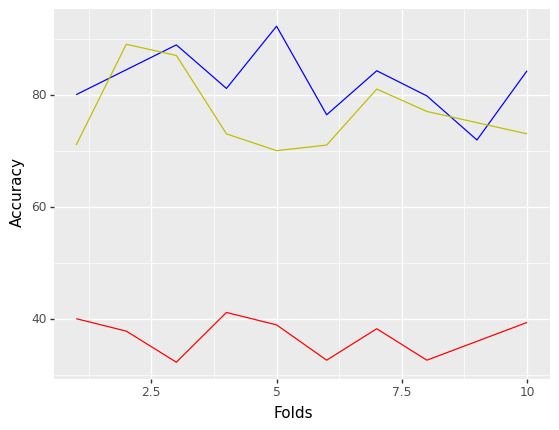

<ggplot: (-9223363296546276366)>

In [ ]:
Accuracy_df=pd.DataFrame()
Accuracy_df=pd.DataFrame(acc_per_foldNB).astype(float)
Accuracy_df.columns=["Accuracy NB" ]
Accuracy_df["Accuracy RF"]=acc_per_foldRF
Accuracy_df["Accuracy DEEP NN"]=acc_per_fold
Accuracy_df["Fold"]=[x for x in range(1,11)]
Accuracy_df.reset_index

plot_cat_all_AF_Selected=(
    ggplot(Accuracy_df)+geom_line(aes(x="Fold",y="Accuracy NB"), color="r")
    + geom_line(aes(x="Fold",y="Accuracy RF"), color="b")
    + geom_line(aes(x="Fold",y="Accuracy DEEP NN"), color="y")
    + labs(x = "Folds", y= "Accuracy",color = "Legend")
)
#BLUE   = RANDOM FOREST
#RED    = NAIVE BAYES
#YELLOW = DEEP NN'''
plot_cat_all_AF_Selected

# OverAll Results

The deductions taken after the study are:

*   The model mostly classifies in a correct way between the different Genres of songs. Most of the errors are Between diefferent Rap Playlists or Punk-Metal...
*   The model does not recognize the lenguaje of the song, classyfing RAP_ESPANOL with TUFF which both are RAP, one American Rap and The other Spanish Rap.
*   PowerHour Playlist is not an appropiate since it is a Gym Playlist which has songs of Rap, Punk, EDM the example of the song "GooseBumps" demostrates it. This song could be classified in both Playlists.

* The use of **Embeddings** to use a categorical variable like the Artist with such a big dimensional space gives a lot of information to the models and that is why we can see such improvement in RF model and Deep Neural Network.

* **Random Forest** is the classifier that should be used.

* **Neural Networks** also have a very great perfomance, very close to the RF models. However, the optimization of the network could be better and in case you optimize it for this problem you will most likely get better results than with the RF model.

* The whole set of continious features will give a decent job, using categorical would give a slightly better result. 

As an Overall, I think that it is performing in a good manner



